# Polar Plot - Directional and Cyclical Data

**Use Case**: Display directional data, cyclical patterns, wind roses, radar comparisons, periodic phenomena

This notebook demonstrates how to create effective polar plots for visualizing directional, seasonal, and cyclical data patterns.


In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.patches import Circle
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Set random seed for reproducibility
np.random.seed(42)

print("Polar plot visualization libraries loaded!")


Polar plot visualization libraries loaded!


In [12]:
# Create sample datasets for polar plots
# 1. Wind Direction and Speed Data
n_wind_observations = 1000

# Generate wind direction data with prevailing winds
prevailing_directions = [45, 225]  # NE and SW winds are common
wind_directions = []
wind_speeds = []

for _ in range(n_wind_observations):
    # Choose between prevailing winds and random
    if np.random.random() < 0.6:  # 60% prevailing winds
        base_direction = np.random.choice(prevailing_directions)
        direction = np.random.normal(base_direction, 20) % 360
        # Stronger prevailing winds
        speed = np.random.gamma(3, 2) + 5
    else:
        direction = np.random.uniform(0, 360)
        speed = np.random.gamma(2, 1.5) + 2
    
    wind_directions.append(direction)
    wind_speeds.append(min(speed, 35))  # Cap at 35 mph

wind_data = pd.DataFrame({
    'Direction': wind_directions,
    'Speed': wind_speeds,
    'Direction_Rad': np.radians(wind_directions)
})

# 2. Seasonal Temperature Patterns
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_angles = np.linspace(0, 2*np.pi, 12, endpoint=False)

# Different climate zones
climate_zones = {
    'Temperate': {'base_temp': 10, 'amplitude': 15, 'phase_shift': 0},
    'Mediterranean': {'base_temp': 15, 'amplitude': 12, 'phase_shift': 0},
    'Continental': {'base_temp': 5, 'amplitude': 25, 'phase_shift': 0},
    'Tropical': {'base_temp': 25, 'amplitude': 5, 'phase_shift': np.pi/6}
}

seasonal_data = []
for climate, params in climate_zones.items():
    temps = []
    for i, angle in enumerate(month_angles):
        # Sinusoidal temperature pattern
        temp = (params['base_temp'] + 
                params['amplitude'] * np.cos(angle - params['phase_shift']) +
                np.random.normal(0, 2))
        temps.append(temp)
        
        seasonal_data.append({
            'Climate': climate,
            'Month': months[i],
            'Month_Angle': angle,
            'Temperature': temp,
            'Month_Number': i + 1
        })

seasonal_df = pd.DataFrame(seasonal_data)

# 3. Sales Performance by Region (24-hour cycle)
hours = np.arange(0, 24)
hour_angles = np.linspace(0, 2*np.pi, 24, endpoint=False)

regions = ['North America', 'Europe', 'Asia Pacific', 'Latin America']
timezone_shifts = [0, 6, 12, 18]  # Hours ahead of reference

sales_data = []
for region, shift in zip(regions, timezone_shifts):
    for hour in hours:
        # Adjust for timezone
        local_hour = (hour + shift) % 24
        local_angle = (local_hour / 24) * 2 * np.pi
        
        # Business hours effect (9 AM to 6 PM local time)
        business_hours_effect = 1 + 0.8 * np.exp(-((local_hour - 13) / 4) ** 2)
        
        # Base sales with business hours pattern
        base_sales = 100 * business_hours_effect + np.random.normal(0, 20)
        sales = max(10, base_sales)  # Minimum sales
        
        sales_data.append({
            'Region': region,
            'Hour_UTC': hour,
            'Hour_Local': local_hour,
            'Hour_Angle': hour_angles[hour],
            'Sales': sales
        })

sales_hourly_df = pd.DataFrame(sales_data)

# 4. Animal Migration Patterns
# Simulate bird migration data with directional preferences
n_observations = 800
migration_seasons = ['Spring', 'Fall']

migration_data = []
for season in migration_seasons:
    for _ in range(n_observations // 2):
        if season == 'Spring':
            # Spring migration: generally northward (315° to 45°)
            preferred_direction = np.random.normal(0, 30) % 360  # North
            strength = np.random.gamma(2, 2) + 1
        else:
            # Fall migration: generally southward (135° to 225°)
            preferred_direction = np.random.normal(180, 30) % 360  # South
            strength = np.random.gamma(2.5, 1.8) + 1
        
        migration_data.append({
            'Season': season,
            'Direction': preferred_direction,
            'Direction_Rad': np.radians(preferred_direction),
            'Migration_Strength': min(strength, 10)
        })

migration_df = pd.DataFrame(migration_data)

# 5. Circadian Rhythm Activity Data
hours_24 = np.arange(0, 24, 0.5)  # Every 30 minutes
hour_angles_detailed = (hours_24 / 24) * 2 * np.pi

activity_types = ['Sleep', 'Light Activity', 'Moderate Activity', 'High Activity']
activity_patterns = {
    'Sleep': {'peak_hour': 2, 'width': 4, 'baseline': 0.1, 'amplitude': 0.2},
    'Light Activity': {'peak_hour': 8, 'width': 3, 'baseline': 0.3, 'amplitude': 0.4},
    'Moderate Activity': {'peak_hour': 14, 'width': 4, 'baseline': 0.2, 'amplitude': 0.3},
    'High Activity': {'peak_hour': 18, 'width': 2, 'baseline': 0.1, 'amplitude': 0.6}
}

circadian_data = []
for hour in hours_24:
    angle = (hour / 24) * 2 * np.pi
    
    for activity, params in activity_patterns.items():
        # Gaussian-like activity pattern
        time_diff = min(abs(hour - params['peak_hour']), 24 - abs(hour - params['peak_hour']))
        activity_level = (params['baseline'] + 
                         params['amplitude'] * np.exp(-(time_diff / params['width']) ** 2) +
                         np.random.normal(0, 0.05))
        activity_level = max(0, min(1, activity_level))  # Clamp between 0 and 1
        
        circadian_data.append({
            'Hour': hour,
            'Hour_Angle': angle,
            'Activity_Type': activity,
            'Activity_Level': activity_level
        })

circadian_df = pd.DataFrame(circadian_data)

print("Sample polar plot datasets created:")
print(f"Wind Data: {len(wind_data)} observations")
print(f"Seasonal Temperatures: {len(seasonal_df)} data points across 4 climates")
print(f"Regional Sales: {len(sales_hourly_df)} hourly data points")
print(f"Migration Patterns: {len(migration_df)} observations")
print(f"Circadian Rhythms: {len(circadian_data)} activity measurements")

# Display sample data
print(f"\nSample Wind Data:")
print(wind_data.head(3))


Sample polar plot datasets created:
Wind Data: 1000 observations
Seasonal Temperatures: 48 data points across 4 climates
Regional Sales: 96 hourly data points
Migration Patterns: 800 observations
Circadian Rhythms: 192 activity measurements

Sample Wind Data:
    Direction      Speed  Direction_Rad
0   55.874863   8.565277       0.975200
1   76.584256  13.252905       1.336647
2  299.679351   3.535410       5.230391


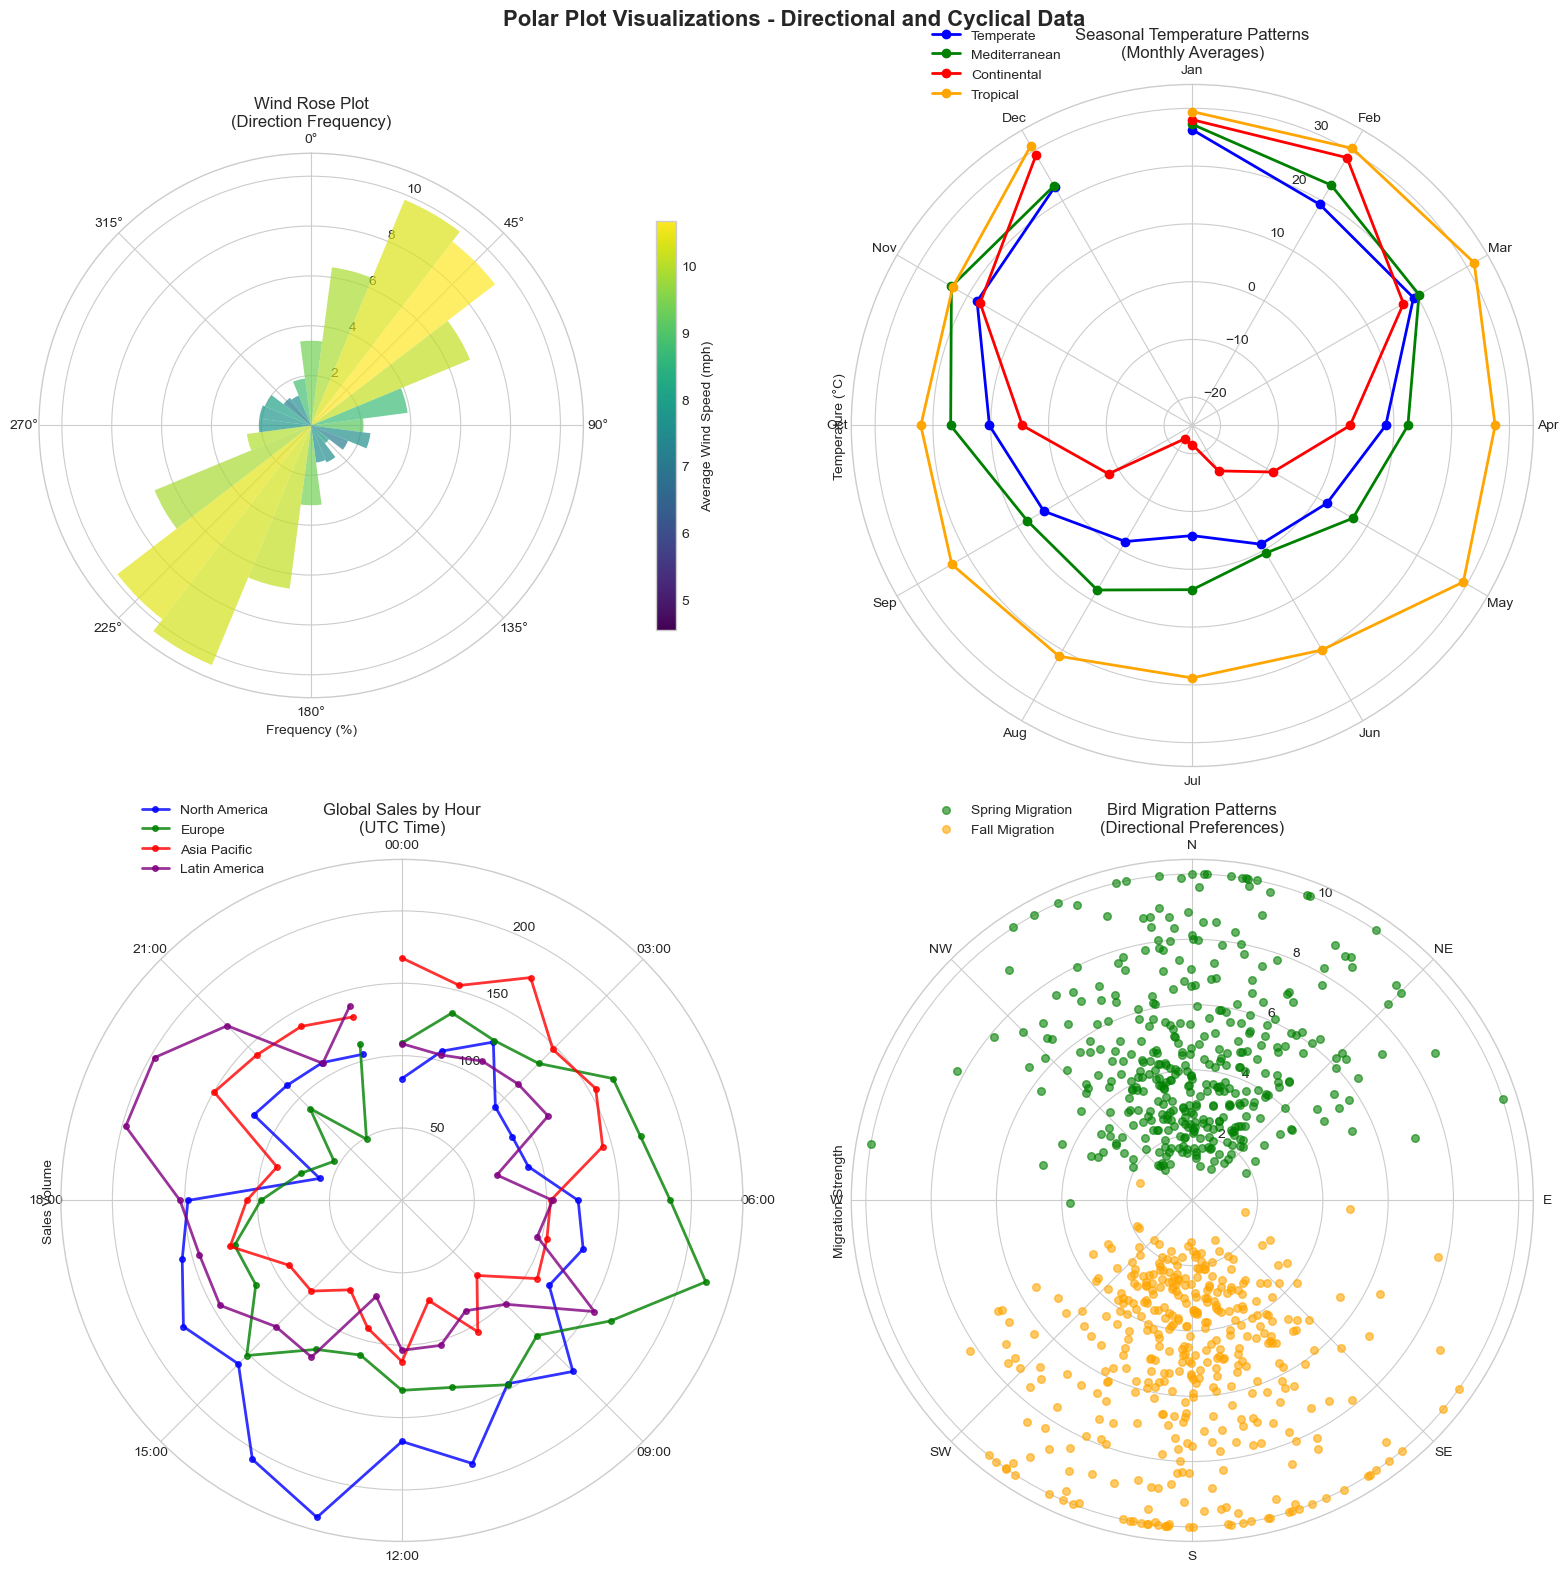

In [13]:
# Create basic polar plots
fig, axes = plt.subplots(2, 2, figsize=(16, 16), subplot_kw=dict(projection='polar'))
fig.suptitle('Polar Plot Visualizations - Directional and Cyclical Data', fontsize=16, fontweight='bold')

# 1. Wind Rose Plot
ax1 = axes[0, 0]

# Create wind rose by binning directions
direction_bins = np.arange(0, 361, 15)  # 24 bins
wind_binned = pd.cut(wind_data['Direction'], bins=direction_bins, labels=direction_bins[:-1])
wind_rose_data = wind_data.groupby(wind_binned)['Speed'].agg(['mean', 'count']).reset_index()

# Convert categorical Direction back to numeric and then to radians
wind_rose_data['Direction_Numeric'] = pd.to_numeric(wind_rose_data['Direction'])
wind_rose_data['Direction_Rad'] = np.radians(wind_rose_data['Direction_Numeric'])
wind_rose_data['Frequency'] = wind_rose_data['count'] / len(wind_data) * 100

# Create wind rose
bars = ax1.bar(wind_rose_data['Direction_Rad'], wind_rose_data['Frequency'], 
               width=np.radians(15), alpha=0.7, 
               color=plt.cm.viridis(wind_rose_data['mean'] / wind_rose_data['mean'].max()))

ax1.set_title('Wind Rose Plot\n(Direction Frequency)', pad=20)
ax1.set_theta_zero_location('N')  # North at top
ax1.set_theta_direction(-1)  # Clockwise
ax1.set_xlabel('Frequency (%)')

# Add color bar for wind speed
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                          norm=plt.Normalize(vmin=wind_rose_data['mean'].min(), 
                                           vmax=wind_rose_data['mean'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, shrink=0.6, pad=0.1)
cbar.set_label('Average Wind Speed (mph)')

# 2. Seasonal Temperature Patterns
ax2 = axes[0, 1]

# Plot each climate zone
colors = ['blue', 'green', 'red', 'orange']
for i, climate in enumerate(climate_zones.keys()):
    climate_data = seasonal_df[seasonal_df['Climate'] == climate]
    ax2.plot(climate_data['Month_Angle'], climate_data['Temperature'], 
            'o-', color=colors[i], label=climate, linewidth=2, markersize=6)

ax2.set_title('Seasonal Temperature Patterns\n(Monthly Averages)', pad=20)
ax2.set_theta_zero_location('N')  # January at top
ax2.set_theta_direction(-1)  # Clockwise through year
ax2.set_thetagrids(np.degrees(month_angles), months)
ax2.set_ylabel('Temperature (°C)')
ax2.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))

# 3. Regional Sales by Hour (24-hour cycle)
ax3 = axes[1, 0]

# Plot sales for each region
region_colors = ['blue', 'green', 'red', 'purple']
for i, region in enumerate(regions):
    region_data = sales_hourly_df[sales_hourly_df['Region'] == region]
    ax3.plot(region_data['Hour_Angle'], region_data['Sales'], 
            'o-', color=region_colors[i], label=region, linewidth=2, markersize=4, alpha=0.8)

ax3.set_title('Global Sales by Hour\n(UTC Time)', pad=20)
ax3.set_theta_zero_location('N')  # Midnight at top
ax3.set_theta_direction(-1)  # Clockwise through day
hour_labels = [f'{h:02d}:00' for h in range(0, 24, 3)]
ax3.set_thetagrids(np.arange(0, 360, 45), hour_labels)
ax3.set_ylabel('Sales Volume')
ax3.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))

# 4. Animal Migration Directions
ax4 = axes[1, 1]

# Create scatter plot for migration data
spring_data = migration_df[migration_df['Season'] == 'Spring']
fall_data = migration_df[migration_df['Season'] == 'Fall']

# Use different markers and colors for seasons
ax4.scatter(spring_data['Direction_Rad'], spring_data['Migration_Strength'], 
           c='green', alpha=0.6, s=30, label='Spring Migration')
ax4.scatter(fall_data['Direction_Rad'], fall_data['Migration_Strength'], 
           c='orange', alpha=0.6, s=30, label='Fall Migration')

ax4.set_title('Bird Migration Patterns\n(Directional Preferences)', pad=20)
ax4.set_theta_zero_location('N')  # North at top
ax4.set_theta_direction(-1)  # Clockwise
ax4.set_ylabel('Migration Strength')
ax4.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))

# Add compass directions
compass_directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
ax4.set_thetagrids(np.arange(0, 360, 45), compass_directions)

plt.tight_layout()
plt.show()


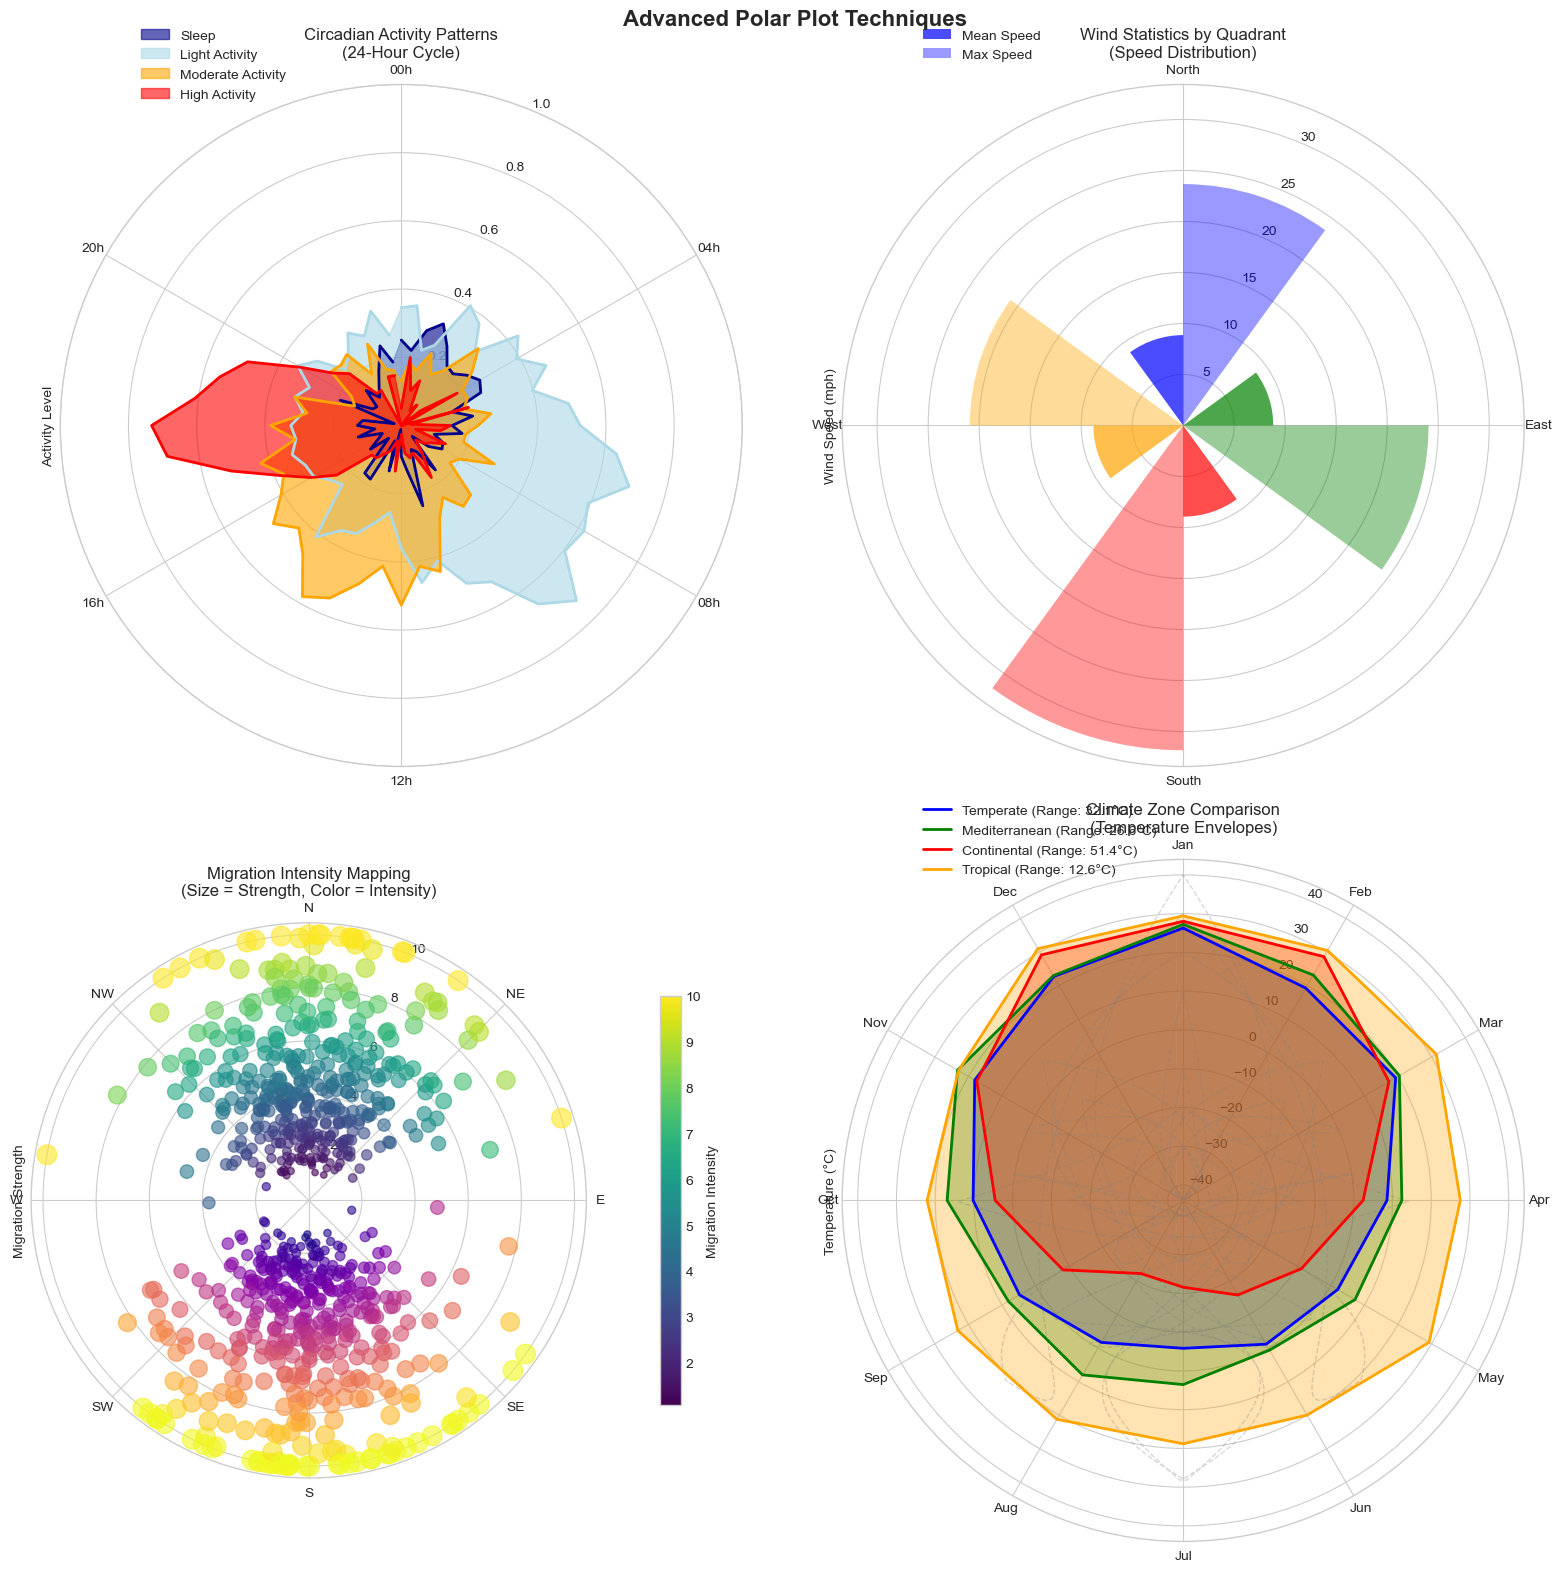

In [14]:
# Advanced polar plot techniques
fig, axes = plt.subplots(2, 2, figsize=(16, 16), subplot_kw=dict(projection='polar'))
fig.suptitle('Advanced Polar Plot Techniques', fontsize=16, fontweight='bold')

# 1. Polar Heatmap - Circadian Activity Patterns
ax1 = axes[0, 0]

# Create activity heatmap
activity_pivot = circadian_df.pivot(index='Hour', columns='Activity_Type', values='Activity_Level')

# Plot each activity type as filled area
activity_colors = ['darkblue', 'lightblue', 'orange', 'red']
for i, activity in enumerate(activity_types):
    angles = circadian_df[circadian_df['Activity_Type'] == activity]['Hour_Angle'].values
    values = circadian_df[circadian_df['Activity_Type'] == activity]['Activity_Level'].values
    
    ax1.fill(angles, values, alpha=0.6, color=activity_colors[i], label=activity)
    ax1.plot(angles, values, color=activity_colors[i], linewidth=2)

ax1.set_title('Circadian Activity Patterns\n(24-Hour Cycle)', pad=20)
ax1.set_theta_zero_location('N')  # Midnight at top
ax1.set_theta_direction(-1)  # Clockwise
hour_labels = [f'{h:02d}h' for h in range(0, 24, 4)]
ax1.set_thetagrids(np.arange(0, 360, 60), hour_labels)
ax1.set_ylim(0, 1)
ax1.set_ylabel('Activity Level')
ax1.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))

# 2. Polar Histogram with Multiple Variables
ax2 = axes[0, 1]

# Wind speed distribution by direction quadrants
quadrants = {
    'North (315°-45°)': wind_data[(wind_data['Direction'] >= 315) | (wind_data['Direction'] < 45)],
    'East (45°-135°)': wind_data[(wind_data['Direction'] >= 45) & (wind_data['Direction'] < 135)],
    'South (135°-225°)': wind_data[(wind_data['Direction'] >= 135) & (wind_data['Direction'] < 225)],
    'West (225°-315°)': wind_data[(wind_data['Direction'] >= 225) & (wind_data['Direction'] < 315)]
}

# Create polar histogram
angles = np.linspace(0, 2*np.pi, len(quadrants), endpoint=False)
quadrant_colors = ['blue', 'green', 'red', 'orange']

for i, (quadrant, data) in enumerate(quadrants.items()):
    # Calculate statistics for each quadrant
    mean_speed = data['Speed'].mean()
    max_speed = data['Speed'].max()
    frequency = len(data)
    
    # Plot bars for different metrics
    bar_width = 2 * np.pi / len(quadrants) * 0.8
    
    # Mean speed bar
    ax2.bar(angles[i] - bar_width/4, mean_speed, width=bar_width/2, 
           alpha=0.7, color=quadrant_colors[i], label='Mean Speed' if i == 0 else "")
    
    # Max speed bar
    ax2.bar(angles[i] + bar_width/4, max_speed, width=bar_width/2, 
           alpha=0.4, color=quadrant_colors[i], label='Max Speed' if i == 0 else "")

ax2.set_title('Wind Statistics by Quadrant\n(Speed Distribution)', pad=20)
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_thetagrids(np.degrees(angles), ['North', 'East', 'South', 'West'])
ax2.set_ylabel('Wind Speed (mph)')
ax2.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))

# 3. Polar Scatter with Size and Color Mapping
ax3 = axes[1, 0]

# Enhanced migration plot with multiple variables
for season in migration_seasons:
    season_data = migration_df[migration_df['Season'] == season]
    
    # Map migration strength to both size and color
    sizes = season_data['Migration_Strength'] * 20  # Scale for visibility
    colors = season_data['Migration_Strength']
    
    scatter = ax3.scatter(season_data['Direction_Rad'], season_data['Migration_Strength'], 
                         c=colors, s=sizes, alpha=0.6, 
                         cmap='viridis' if season == 'Spring' else 'plasma',
                         label=f'{season} Migration')

ax3.set_title('Migration Intensity Mapping\n(Size = Strength, Color = Intensity)', pad=20)
ax3.set_theta_zero_location('N')
ax3.set_theta_direction(-1)
ax3.set_thetagrids(np.arange(0, 360, 45), ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
ax3.set_ylabel('Migration Strength')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                          norm=plt.Normalize(vmin=migration_df['Migration_Strength'].min(),
                                           vmax=migration_df['Migration_Strength'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax3, shrink=0.6, pad=0.1)
cbar.set_label('Migration Intensity')

# 4. Polar Comparison Plot
ax4 = axes[1, 1]

# Define colors for climate zones
colors = ['blue', 'green', 'red', 'orange']

# Compare temperature ranges across climate zones
for i, climate in enumerate(climate_zones.keys()):
    climate_data = seasonal_df[seasonal_df['Climate'] == climate]
    
    # Calculate moving average for smoother curves
    angles = climate_data['Month_Angle'].values
    temps = climate_data['Temperature'].values
    
    # Create closed curve by repeating first point
    angles_closed = np.append(angles, angles[0])
    temps_closed = np.append(temps, temps[0])
    
    # Plot filled area
    ax4.fill(angles_closed, temps_closed, alpha=0.3, color=colors[i])
    ax4.plot(angles_closed, temps_closed, color=colors[i], linewidth=2, 
            label=f'{climate} (Range: {temps.max()-temps.min():.1f}°C)')

# Add reference circles for temperature ranges
temp_ranges = [0, 10, 20, 30, 40]
for temp in temp_ranges:
    circle = Circle((0, 0), temp, fill=False, color='gray', alpha=0.3, linestyle='--')
    ax4.add_patch(circle)

ax4.set_title('Climate Zone Comparison\n(Temperature Envelopes)', pad=20)
ax4.set_theta_zero_location('N')  # January at top
ax4.set_theta_direction(-1)
ax4.set_thetagrids(np.degrees(month_angles), months)
ax4.set_ylabel('Temperature (°C)')
ax4.legend(loc='upper left', bbox_to_anchor=(0.1, 1.1))

plt.tight_layout()
plt.show()


In [15]:
# Interactive polar plots (Plotly structure)
print("Interactive Polar Plots (Plotly):")
print("=" * 50)

print("\n1. Basic Interactive Polar Scatter")
print("Code structure:")
print("""
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=df['radius_values'],
    theta=df['angle_values'],
    mode='markers',
    marker=dict(
        size=df['size_values'],
        color=df['color_values'],
        colorscale='Viridis',
        showscale=True
    ),
    text=df['hover_text'],
    name='Data Points'
))

fig.update_layout(
    title="Interactive Polar Scatter Plot",
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max_radius]),
        angularaxis=dict(direction="clockwise", period=360)
    )
)

fig.show()
""")

print("\n2. Interactive Wind Rose")
print("Code structure:")
print("""
# Create wind rose with binned data
fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=frequency_values,
    theta=direction_bins,
    width=bin_width,
    marker_color=speed_values,
    marker_colorscale='Viridis',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    hovertemplate="Direction: %{theta}°<br>" +
                  "Frequency: %{r}%<br>" +
                  "Avg Speed: %{marker.color}<br>" +
                  "<extra></extra>"
))

fig.update_layout(
    title="Interactive Wind Rose",
    polar=dict(
        radialaxis=dict(title="Frequency (%)", angle=90),
        angularaxis=dict(direction="clockwise", rotation=90)
    )
)

fig.show()
""")

print("\n3. Animated Polar Plot (Time Series)")
print("Code structure:")
print("""
# Create animated polar plot showing changes over time
fig = go.Figure()

# Add initial trace
fig.add_trace(go.Scatterpolar(
    r=initial_data['r'],
    theta=initial_data['theta'],
    mode='lines+markers',
    name='Time Series'
))

# Create animation frames
frames = []
for time_point in time_series:
    frame = go.Frame(
        data=[go.Scatterpolar(
            r=time_data[time_point]['r'],
            theta=time_data[time_point]['theta'],
            mode='lines+markers'
        )],
        name=str(time_point)
    )
    frames.append(frame)

fig.frames = frames

# Add play/pause buttons
fig.update_layout(
    updatemenus=[
        dict(type="buttons",
             buttons=[dict(label="Play", method="animate", args=[None]),
                     dict(label="Pause", method="animate", args=[[None]])])
    ],
    polar=dict(radialaxis=dict(range=[0, max_r]))
)

fig.show()
""")

print("\n4. Multi-trace Polar Comparison")
print("Code structure:")
print("""
fig = go.Figure()

# Add multiple traces for comparison
for category in categories:
    category_data = df[df['category'] == category]
    
    fig.add_trace(go.Scatterpolar(
        r=category_data['r'],
        theta=category_data['theta'],
        mode='lines',
        fill='toself',
        name=category,
        opacity=0.6
    ))

# Add dropdown for trace selection
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True] * len(categories)}]),
                dict(label="None",
                     method="update",
                     args=[{"visible": [False] * len(categories)}])
            ] + [
                dict(label=cat,
                     method="update",
                     args=[{"visible": [c == cat for c in categories]}])
                for cat in categories
            ])
        )
    ],
    polar=dict(
        radialaxis=dict(visible=True),
        angularaxis=dict(direction="clockwise")
    )
)

fig.show()
""")


Interactive Polar Plots (Plotly):

1. Basic Interactive Polar Scatter
Code structure:

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=df['radius_values'],
    theta=df['angle_values'],
    mode='markers',
    marker=dict(
        size=df['size_values'],
        color=df['color_values'],
        colorscale='Viridis',
        showscale=True
    ),
    text=df['hover_text'],
    name='Data Points'
))

fig.update_layout(
    title="Interactive Polar Scatter Plot",
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max_radius]),
        angularaxis=dict(direction="clockwise", period=360)
    )
)

fig.show()


2. Interactive Wind Rose
Code structure:

# Create wind rose with binned data
fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=frequency_values,
    theta=direction_bins,
    width=bin_width,
    marker_color=speed_values,
    marker_colorscale='Viridis',
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8,
    hovertemplate="Direction: %{th

In [16]:
# Statistical analysis of polar data
print("Polar Plot Statistical Analysis:")
print("=" * 50)

# 1. Directional Statistics for Wind Data
print("1. WIND DIRECTION STATISTICAL ANALYSIS:")

# Calculate circular statistics
def circular_mean(angles_deg):
    """Calculate circular mean of angles in degrees"""
    angles_rad = np.radians(angles_deg)
    x = np.cos(angles_rad)
    y = np.sin(angles_rad)
    mean_angle_rad = np.arctan2(np.mean(y), np.mean(x))
    return np.degrees(mean_angle_rad) % 360

def circular_std(angles_deg):
    """Calculate circular standard deviation"""
    angles_rad = np.radians(angles_deg)
    x = np.cos(angles_rad)
    y = np.sin(angles_rad)
    R = np.sqrt(np.mean(x)**2 + np.mean(y)**2)
    return np.degrees(np.sqrt(-2 * np.log(R)))

# Wind direction statistics
wind_mean_direction = circular_mean(wind_data['Direction'])
wind_std_direction = circular_std(wind_data['Direction'])

print(f"   Wind Direction Analysis:")
print(f"     Mean Direction: {wind_mean_direction:.1f}° ({wind_mean_direction/45:.1f} compass points)")
print(f"     Circular Std Dev: {wind_std_direction:.1f}°")

# Determine predominant wind direction
compass_directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 
                     'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
direction_index = int((wind_mean_direction + 11.25) / 22.5) % 16
predominant_direction = compass_directions[direction_index]

print(f"     Predominant Direction: {predominant_direction}")

# Calculate directional consistency
angles_rad = np.radians(wind_data['Direction'])
R = np.sqrt(np.mean(np.cos(angles_rad))**2 + np.mean(np.sin(angles_rad))**2)
consistency = R  # R ranges from 0 (random) to 1 (perfectly consistent)

consistency_level = "High" if consistency > 0.7 else "Moderate" if consistency > 0.4 else "Low"
print(f"     Directional Consistency: {consistency_level} (R = {consistency:.3f})")

# Wind speed by direction analysis
direction_bins = pd.cut(wind_data['Direction'], bins=np.arange(0, 361, 45), 
                       labels=['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
speed_by_direction = wind_data.groupby(direction_bins)['Speed'].agg(['mean', 'std', 'count'])

print(f"\n   Wind Speed by Direction:")
for direction, stats in speed_by_direction.iterrows():
    if not pd.isna(direction):
        print(f"     {direction}: {stats['mean']:.1f} ± {stats['std']:.1f} mph (n={stats['count']})")

# 2. Seasonal Pattern Analysis
print(f"\n2. SEASONAL TEMPERATURE PATTERN ANALYSIS:")

for climate in climate_zones.keys():
    climate_data = seasonal_df[seasonal_df['Climate'] == climate]
    
    # Calculate seasonal statistics
    temp_range = climate_data['Temperature'].max() - climate_data['Temperature'].min()
    temp_mean = climate_data['Temperature'].mean()
    temp_std = climate_data['Temperature'].std()
    
    # Find peak and trough months
    peak_month_idx = climate_data['Temperature'].idxmax()
    trough_month_idx = climate_data['Temperature'].idxmin()
    peak_month = climate_data.loc[peak_month_idx, 'Month']
    trough_month = climate_data.loc[trough_month_idx, 'Month']
    
    # Calculate seasonal amplitude (how much temperature varies)
    seasonal_amplitude = temp_range / 2
    
    print(f"\n   {climate} Climate:")
    print(f"     Annual Mean: {temp_mean:.1f}°C")
    print(f"     Seasonal Range: {temp_range:.1f}°C")
    print(f"     Seasonal Amplitude: {seasonal_amplitude:.1f}°C")
    print(f"     Peak Month: {peak_month} ({climate_data.loc[peak_month_idx, 'Temperature']:.1f}°C)")
    print(f"     Trough Month: {trough_month} ({climate_data.loc[trough_month_idx, 'Temperature']:.1f}°C)")

# 3. Regional Sales Temporal Analysis
print(f"\n3. REGIONAL SALES TEMPORAL ANALYSIS:")

for region in regions:
    region_data = sales_hourly_df[sales_hourly_df['Region'] == region]
    
    # Find peak sales hours
    peak_hour_idx = region_data['Sales'].idxmax()
    peak_hour = region_data.loc[peak_hour_idx, 'Hour_UTC']
    peak_sales = region_data.loc[peak_hour_idx, 'Sales']
    
    # Calculate business hours performance (assuming 9 AM - 6 PM local time)
    business_hours = region_data[(region_data['Hour_Local'] >= 9) & (region_data['Hour_Local'] <= 18)]
    off_hours = region_data[(region_data['Hour_Local'] < 9) | (region_data['Hour_Local'] > 18)]
    
    business_avg = business_hours['Sales'].mean()
    off_hours_avg = off_hours['Sales'].mean()
    business_ratio = business_avg / off_hours_avg if off_hours_avg > 0 else 0
    
    print(f"\n   {region}:")
    print(f"     Peak Sales Hour (UTC): {peak_hour}:00 ({peak_sales:.1f} units)")
    print(f"     Business Hours Avg: {business_avg:.1f} units")
    print(f"     Off Hours Avg: {off_hours_avg:.1f} units")
    print(f"     Business/Off-Hours Ratio: {business_ratio:.2f}x")

# 4. Migration Pattern Analysis
print(f"\n4. MIGRATION PATTERN ANALYSIS:")

for season in migration_seasons:
    season_data = migration_df[migration_df['Season'] == season]
    
    # Calculate circular statistics for migration
    mean_direction = circular_mean(season_data['Direction'])
    std_direction = circular_std(season_data['Direction'])
    
    # Convert to compass direction
    direction_index = int((mean_direction + 11.25) / 22.5) % 16
    compass_direction = compass_directions[direction_index]
    
    # Calculate migration strength statistics
    strength_mean = season_data['Migration_Strength'].mean()
    strength_std = season_data['Migration_Strength'].std()
    
    print(f"\n   {season} Migration:")
    print(f"     Mean Direction: {mean_direction:.1f}° ({compass_direction})")
    print(f"     Directional Spread: {std_direction:.1f}°")
    print(f"     Mean Strength: {strength_mean:.2f} ± {strength_std:.2f}")

# Compare seasonal differences
spring_directions = migration_df[migration_df['Season'] == 'Spring']['Direction']
fall_directions = migration_df[migration_df['Season'] == 'Fall']['Direction']

# Calculate angular difference between seasons
spring_mean = circular_mean(spring_directions)
fall_mean = circular_mean(fall_directions)
angular_difference = abs(spring_mean - fall_mean)
if angular_difference > 180:
    angular_difference = 360 - angular_difference

print(f"\n   Seasonal Comparison:")
print(f"     Angular Difference: {angular_difference:.1f}°")
print(f"     Migration Opposition: {'Strong' if angular_difference > 150 else 'Moderate' if angular_difference > 90 else 'Weak'}")

# 5. Circadian Rhythm Analysis
print(f"\n5. CIRCADIAN RHYTHM ANALYSIS:")

for activity in activity_types:
    activity_data = circadian_df[circadian_df['Activity_Type'] == activity]
    
    # Find peak activity time
    peak_idx = activity_data['Activity_Level'].idxmax()
    peak_hour = activity_data.loc[peak_idx, 'Hour']
    peak_level = activity_data.loc[peak_idx, 'Activity_Level']
    
    # Calculate activity statistics
    mean_level = activity_data['Activity_Level'].mean()
    activity_range = activity_data['Activity_Level'].max() - activity_data['Activity_Level'].min()
    
    # Find active period (above 50% of max)
    threshold = activity_data['Activity_Level'].max() * 0.5
    active_periods = activity_data[activity_data['Activity_Level'] >= threshold]
    
    if len(active_periods) > 0:
        active_duration = len(active_periods) * 0.5  # Each point is 30 minutes
        active_start = active_periods['Hour'].min()
        active_end = active_periods['Hour'].max()
    else:
        active_duration = 0
        active_start = active_end = 0
    
    print(f"\n   {activity}:")
    print(f"     Peak Time: {peak_hour:.1f}h ({peak_level:.3f} level)")
    print(f"     Mean Level: {mean_level:.3f}")
    print(f"     Activity Range: {activity_range:.3f}")
    print(f"     Active Duration: {active_duration:.1f} hours")
    if active_duration > 0:
        print(f"     Active Period: {active_start:.1f}h - {active_end:.1f}h")

# 6. Polar Plot Design Effectiveness
print(f"\n6. POLAR PLOT DESIGN ANALYSIS:")

print("   Data Suitability Assessment:")
datasets_analysis = {
    'Wind Data': {
        'directional': True,
        'cyclic': False,
        'continuous': True,
        'suitability': 'Excellent'
    },
    'Seasonal Temperatures': {
        'directional': False,
        'cyclic': True,
        'continuous': True,
        'suitability': 'Excellent'
    },
    'Regional Sales': {
        'directional': False,
        'cyclic': True,
        'continuous': True,
        'suitability': 'Good'
    },
    'Migration Patterns': {
        'directional': True,
        'cyclic': False,
        'continuous': True,
        'suitability': 'Excellent'
    },
    'Circadian Rhythms': {
        'directional': False,
        'cyclic': True,
        'continuous': True,
        'suitability': 'Good'
    }
}

for dataset, properties in datasets_analysis.items():
    print(f"     {dataset}: {properties['suitability']}")
    print(f"       Directional: {'Yes' if properties['directional'] else 'No'}")
    print(f"       Cyclic: {'Yes' if properties['cyclic'] else 'No'}")
    print(f"       Continuous: {'Yes' if properties['continuous'] else 'No'}")

print(f"\n   Visualization Guidelines:")
print("   ✓ Use polar plots for directional data (wind, migration)")  
print("   ✓ Use polar plots for cyclic temporal data (seasonal, daily)")
print("   ✓ Set theta=0 appropriately (North for directions, midnight/January for time)")
print("   ✓ Choose clockwise/counterclockwise direction meaningfully")
print("   ✓ Use filled areas for continuous phenomena")
print("   ✓ Use scatter plots for discrete directional observations")
print("   ✓ Include compass/time labels for clarity")

print(f"\nWhen to Use Polar Plots:")
print("   • Wind rose diagrams and meteorological data")
print("   • Seasonal and daily cycle visualization")
print("   • Animal behavior and migration patterns")
print("   • Directional preferences and orientations")
print("   • Radar and sonar data visualization")
print("   • Circadian and biological rhythms")
print("   • Geographic orientation analysis")

print(f"\nAlternatives to Consider:")
print("   • Cartesian line plots for simple time series")
print("   • Rose diagrams for frequency distributions")
print("   • Radar charts for multi-dimensional comparisons")
print("   • Heat maps for time-direction relationships")
print("   • Circular histograms for directional frequencies")


Polar Plot Statistical Analysis:
1. WIND DIRECTION STATISTICAL ANALYSIS:
   Wind Direction Analysis:
     Mean Direction: 79.1° (1.8 compass points)
     Circular Std Dev: 194.5°
     Predominant Direction: E
     Directional Consistency: Low (R = 0.003)

   Wind Speed by Direction:
     N: 9.5 ± 4.3 mph (n=196.0)
     NE: 9.7 ± 4.2 mph (n=201.0)
     E: 6.0 ± 3.7 mph (n=61.0)
     SE: 5.4 ± 2.3 mph (n=40.0)
     S: 9.6 ± 4.9 mph (n=202.0)
     SW: 9.8 ± 4.1 mph (n=192.0)
     W: 5.8 ± 3.3 mph (n=62.0)
     NW: 6.0 ± 3.3 mph (n=46.0)

2. SEASONAL TEMPERATURE PATTERN ANALYSIS:

   Temperate Climate:
     Annual Mean: 10.2°C
     Seasonal Range: 32.1°C
     Seasonal Amplitude: 16.1°C
     Peak Month: Jan (26.3°C)
     Trough Month: Jul (-5.8°C)

   Mediterranean Climate:
     Annual Mean: 14.5°C
     Seasonal Range: 26.6°C
     Seasonal Amplitude: 13.3°C
     Peak Month: Jan (27.2°C)
     Trough Month: Jun (0.6°C)

   Continental Climate:
     Annual Mean: 4.3°C
     Seasonal Range: 51.4